# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

\Data Source: https://www.kaggle.com/c/titanic

![image.png](attachment:image.png)

# TASK #2: IMPORT LIBRARIES AND DATASETS

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd 'drive/MyDrive/Colab Notebooks/TRASK'

/content/drive/MyDrive/Colab Notebooks/TRASK


In [1]:
!ls

'Logistic Regression and Naive Bayes for Titanic Survivor Prediction.ipynb'
 titanic.csv


In [4]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.8 MB 32.4 MB/s            
     |████████████████████████████████| 965 kB 88.2 MB/s            
     |████████████████████████████████| 299 kB 88.4 MB/s            
     |████████████████████████████████| 1.6 MB 65.7 MB/s            
     |████████████████████████████████| 3.3 MB 74.4 MB/s            
     |████████████████████████████████| 98 kB 12.2 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 293 kB 26.7 MB/s            


In [6]:
pip install pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Import Key Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#from jupyterthemes import jtplot
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them. 


In [6]:
# Read the data using pandas dataframe
titanic_df = pd.read_csv('titanic.csv')


In [7]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
# Show the data head!
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Display the last 7 rows in the titanic_df dataframe**

In [9]:
titanic_df.iloc[-7:].head(7)
#titanic_df.tail(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.050,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.750,NaN,Q


# TASK #3: PERFORM DATA VISUALIZATION - PART #1

In [10]:
# Let's count the number of survivors and non-survivors
survived_df = titanic_df[titanic_df['Survived']==1]
no_survived_df = titanic_df[titanic_df['Survived']==0]

In [11]:
survived_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [12]:
# Count the survived and deceased 
print("Total =", len(titanic_df))

print("Number of passengers who survived =", len(survived_df))
print("Percentage Survived =", 1. * len(survived_df) / len(titanic_df) * 100.0, "%")
 
print("Number of passengers who did not Survive =", len(no_survived_df))
print("Percentage who did not survive =", 1. * len(no_survived_df) / len(titanic_df) * 100.0, "%")
         

Total = 891
Number of passengers who survived = 342
Percentage Survived = 38.38383838383838 %
Number of passengers who did not Survive = 549
Percentage who did not survive = 61.61616161616161 %


<AxesSubplot: xlabel='Pclass', ylabel='count'>

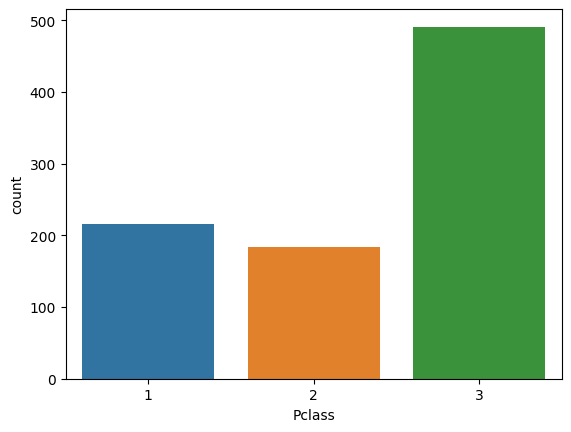

In [13]:
# Bar Chart to indicate the number of people who survived based on their class
# If you are a first class, you have a higher chance of survival
sns.countplot(x = 'Pclass', data = titanic_df)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

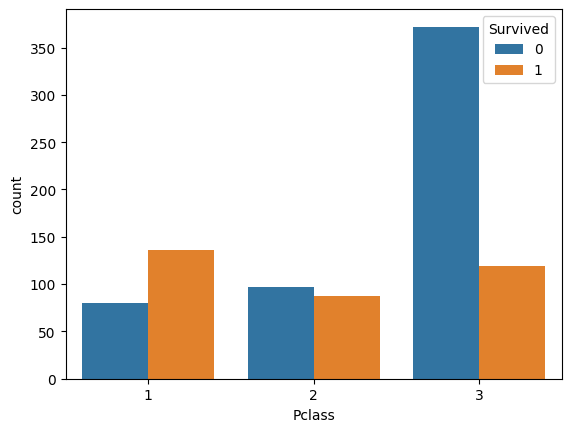

In [14]:
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_df)

<AxesSubplot: xlabel='Pclass', ylabel='count'>

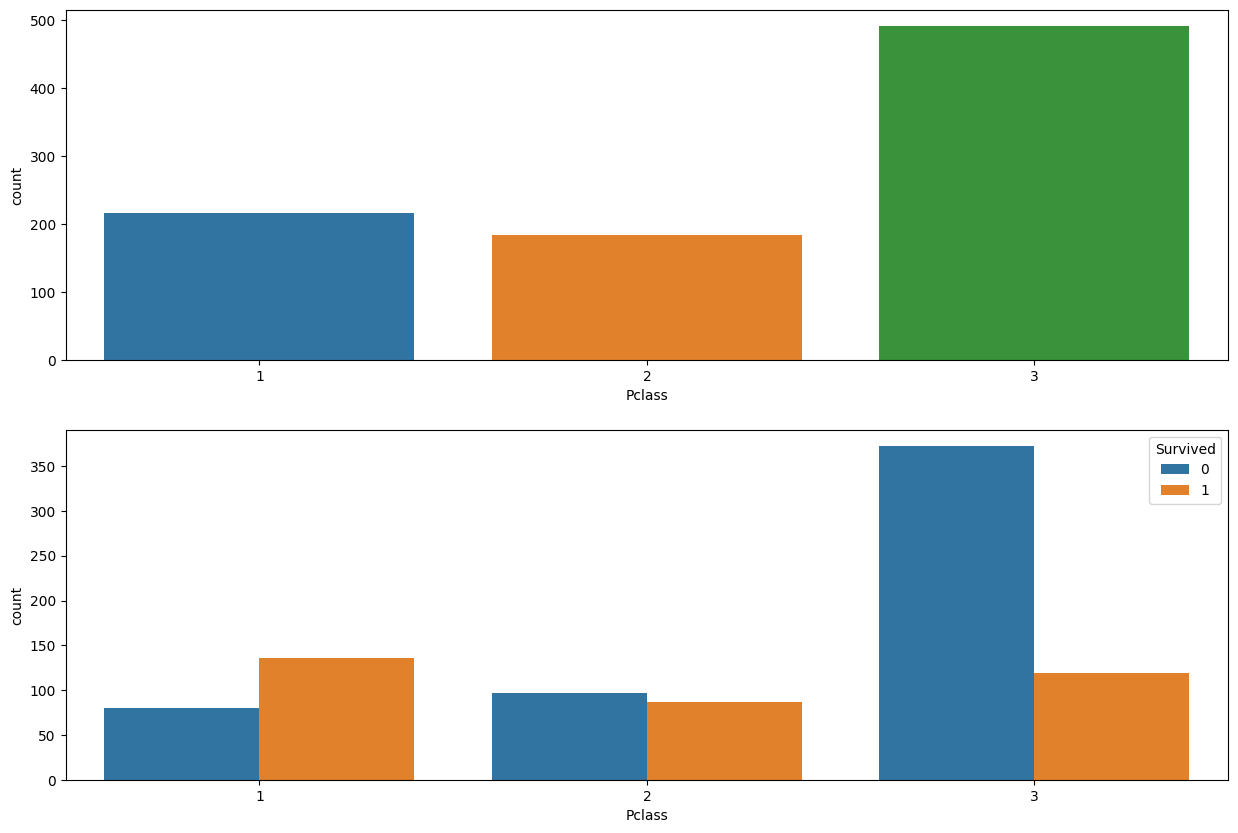

In [15]:
plt.figure(figsize = [15,10])
plt.subplot(211)
sns.countplot(x = 'Pclass', data = titanic_df)

plt.subplot(212)
sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_df)

**PRACTICE OPPORTUNITY #2 [OPTIONAL]:**
- **Plot the number of people who survived based on thier siblings status**
- **Do you have a higher chance of survival if you have zero or one sibling?**

<AxesSubplot: xlabel='SibSp', ylabel='count'>

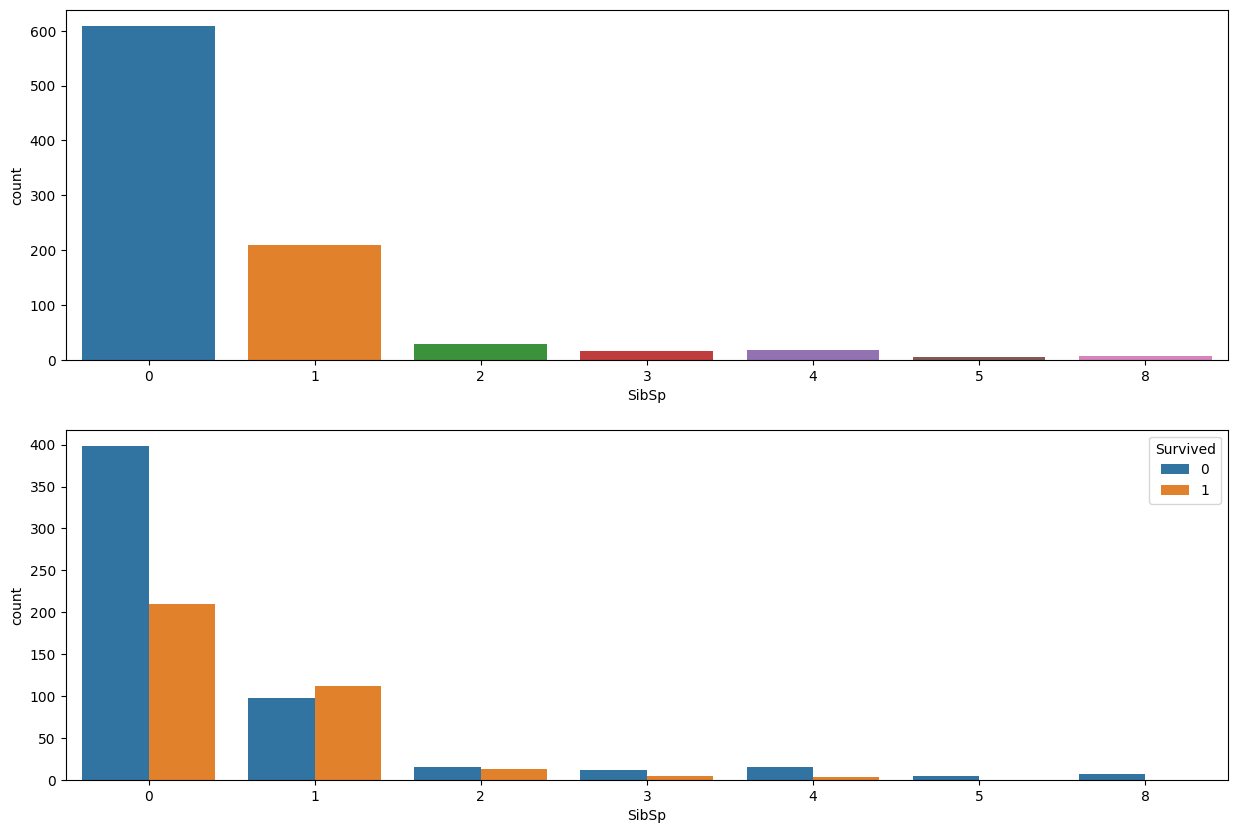

In [16]:
plt.figure(figsize = [15,10])
plt.subplot(211)
sns.countplot(x = 'SibSp', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'SibSp', hue = 'Survived', data = titanic_df)

# TASK #4: PERFORM DATA VISUALIZATION - PART #2

<AxesSubplot: xlabel='Parch', ylabel='count'>

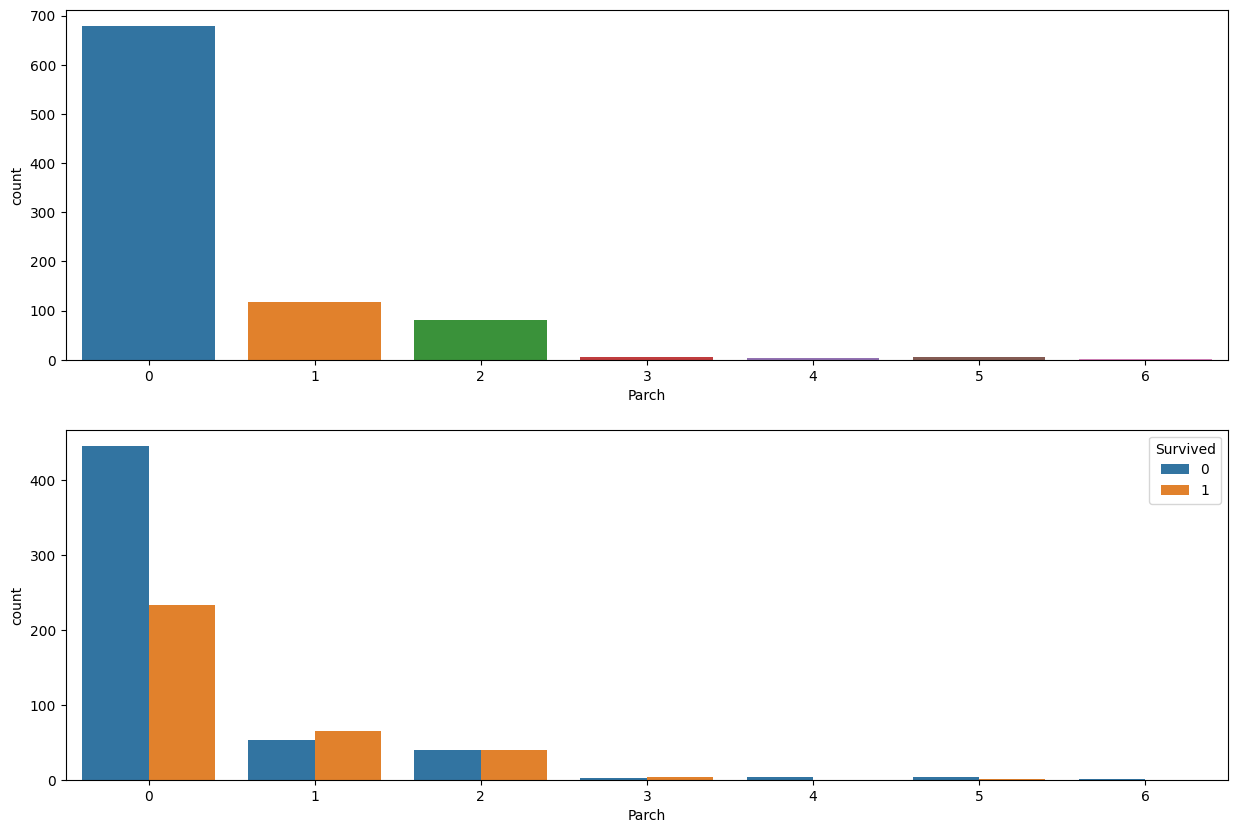

In [17]:
# Bar Chart to indicate the number of people survived based on their Parch status (how many parents onboard)
# If you have 1, 2, or 3 family members (Parch = 1,2), you have a higher chance of survival compared to being alone (Parch = 0)
plt.figure(figsize = [15, 10])
plt.subplot(211)
sns.countplot(x = 'Parch', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'Parch', hue = 'Survived', data = titanic_df)

<AxesSubplot: xlabel='Sex', ylabel='count'>

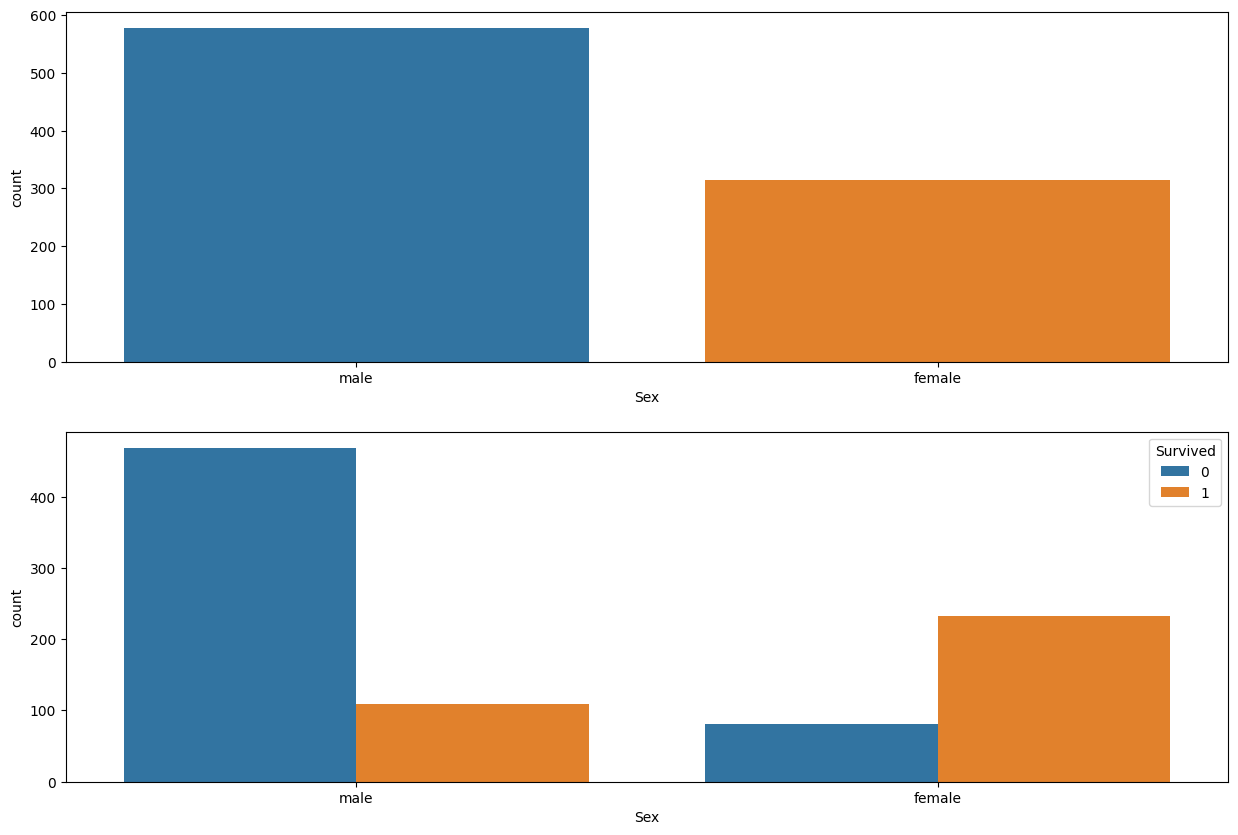

In [18]:
# Bar Chart to indicate the number of people survived based on their sex
# If you are a female, you have a higher chance of survival compared to other ports!
plt.figure(figsize = [15, 10])
plt.subplot(211)
sns.countplot(x = 'Sex', data = titanic_df)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_df)

<AxesSubplot: >

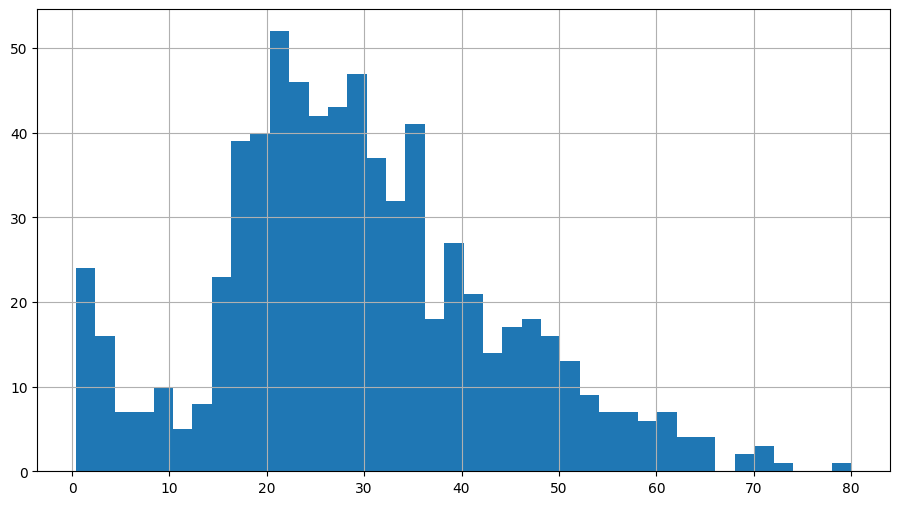

In [19]:
# Age Histogram 
plt.figure(figsize = [11, 6])
titanic_df['Age'].hist(bins = 40)

**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Plot the histogram for the "Fare" column**

<AxesSubplot: >

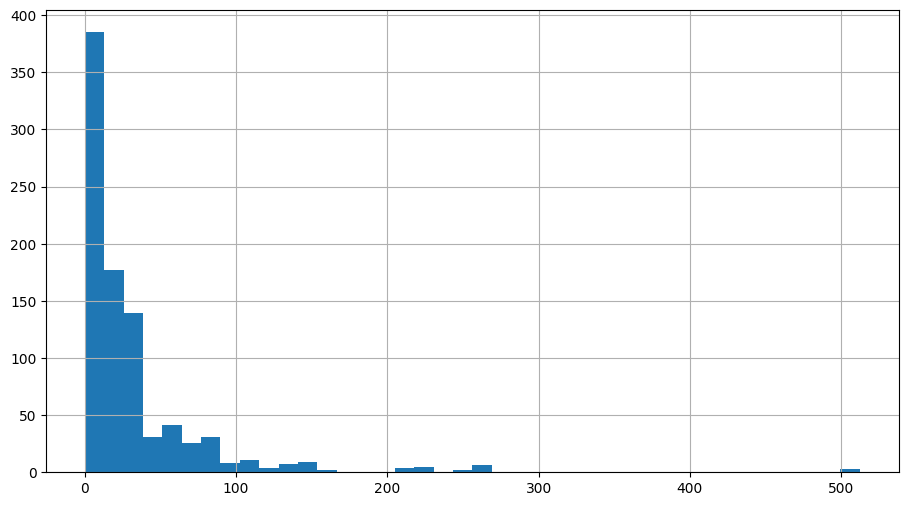

In [20]:
plt.figure(figsize = [11, 6])
titanic_df['Fare'].hist(bins = 40)

# TASK #5: PERFORM DATA CLEANING AND FEATURE ENGINEERING

<AxesSubplot: >

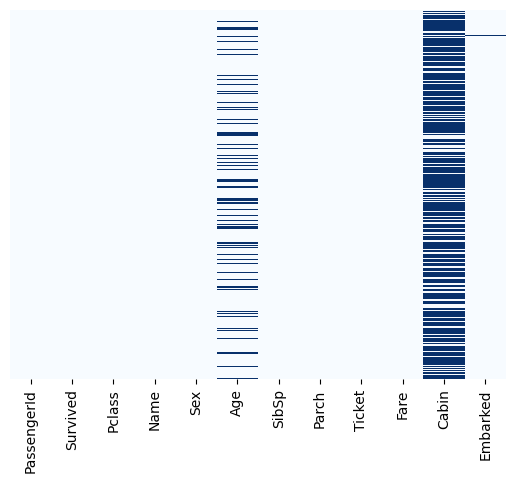

In [21]:
# Let's explore which dataset is missing
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [22]:
# Let's drop the cabin coloumn and test with inplace = true and false
titanic_df.drop('Cabin', axis = 1, inplace = True)

In [23]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [24]:
# Let's drop the embarked, Ticket, passengerID, and Name as well
titanic_df.drop(['Name', 'Ticket', 'Embarked', 'PassengerId'], axis = 1, inplace = True)

In [25]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


<AxesSubplot: >

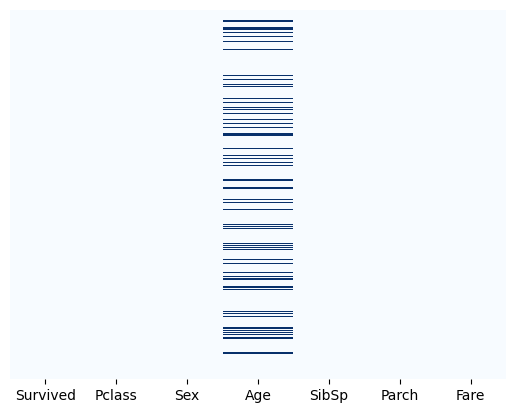

In [26]:
# Let's view the data one more time!
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


<AxesSubplot: xlabel='Sex', ylabel='Age'>

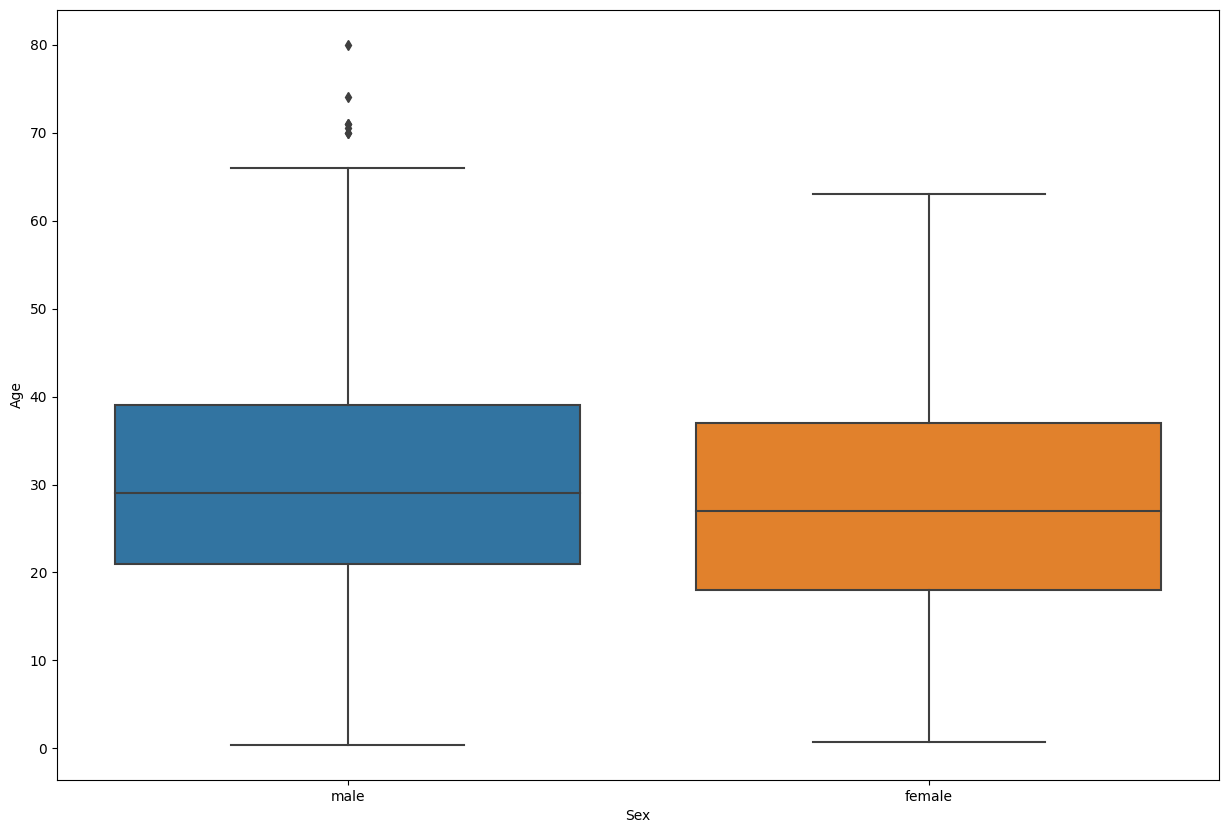

In [27]:
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'Sex', y = 'Age', data = titanic_df)

In [28]:
def Fill_Age(data):
    age = data[0]
    sex = data[1]

    if pd.isnull(age):
        if sex == 'male': 
            return 29
        else:
            return 25
    else:
        return age
        

In [29]:
titanic_df['Age'] = titanic_df[['Age', 'Sex']].apply(Fill_Age, axis = 1)

<AxesSubplot: >

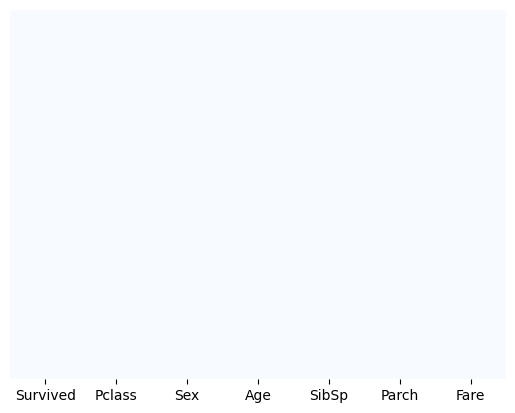

In [30]:
# Let's view the data one more time!
sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [31]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,25.0,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [32]:
# You just need one column only to represent male or female
pd.get_dummies(titanic_df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [33]:
male = pd.get_dummies(titanic_df['Sex'], drop_first = True)


In [34]:
# first let's drop the embarked and sex 
titanic_df.drop(['Sex'], axis = 1, inplace = True)

In [35]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,25.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [36]:
# Now let's add the encoded column male again
titanic_df = pd.concat([titanic_df, male], axis = 1)

In [37]:
titanic_df

,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1
887,1,1,19.0,0,0,30.0000,0
888,0,3,25.0,1,2,23.4500,0
889,1,1,26.0,0,0,30.0000,1


# TASK #6: TRAIN LOGISTIC REGRESSION CLASSIFIER MODEL

![image.png](attachment:image.png)

In [43]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 9.5 MB 26.0 MB/s            
     |████████████████████████████████| 34.4 MB 70.3 MB/s            
     |████████████████████████████████| 297 kB 73.3 MB/s            


In [44]:
#Let's drop the target coloumn before we do train test split
X = titanic_df.drop('Survived', axis = 1).values
y = titanic_df['Survived'].values


In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [46]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

# TASK #7: ASSESS TRAINED MODEL PERFORMANCE

In [47]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

<AxesSubplot: >

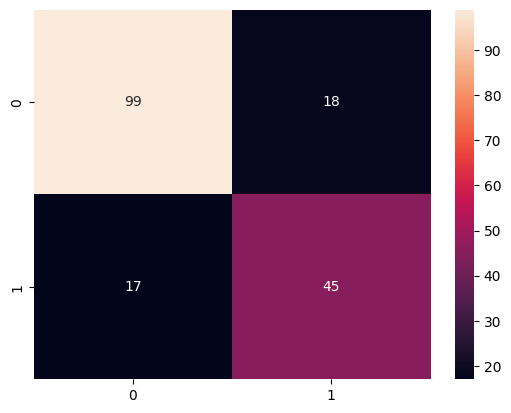

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       117
           1       0.71      0.73      0.72        62

    accuracy                           0.80       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.81      0.80      0.80       179



**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Train a Naive Bayes Classifier Model using Scikit-Learn**
- **Assess trained model performance**
- **Plot the confusion matrix and classification report**

In [50]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

#from sklearn.naive_bayes import ComplementNB
#classifier = ComplementNB()
#classifier.fit(X_train, y_train)

MultinomialNB()

In [51]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1])

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       117
           1       0.73      0.53      0.62        62

    accuracy                           0.77       179
   macro avg       0.76      0.71      0.73       179
weighted avg       0.77      0.77      0.76       179



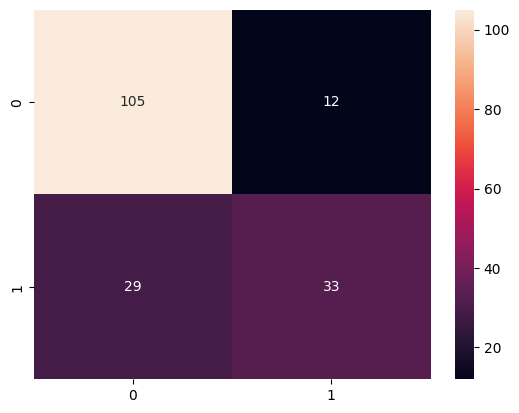

In [52]:
y_predict_test = classifier.predict(X_test)
y_predict_test

cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True, fmt = "d")

print(classification_report(y_test, y_predict_test))